# stroke prediction dataset
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [2]:
df=pd.read_csv(r'D:\datasets\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
col=df.columns
print(col)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
y=df['stroke']
df=df.drop(['id'],axis=1)

In [8]:
# np.where(df['bmi'].isnull()==True,)

In [9]:
# np.where(df['bmi'].isnull()==True,data.append(df),)

In [10]:
# a=[1,2,3,4]
# b=['6','7','8','9']
# result=[]
# result=zip(b,a)
# print(dict(result))
# k=pd.DataFrame(set(result))
# print(k.head())

In [11]:
numerical=df.select_dtypes('number') 
categorical=df.select_dtypes('object') 

In [12]:
print("num_cols:",numerical.columns)
print("cat_cols:",categorical.columns)

num_cols: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')
cat_cols: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<AxesSubplot:xlabel='bmi'>

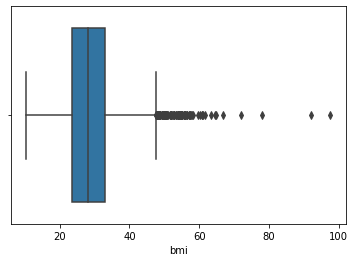

In [14]:
sns.boxplot(x='bmi',data=df)

In [15]:
numerical['bmi']=numerical['bmi'].fillna(numerical['bmi'].median())

C:\Users\riddh\AppData\Local\Temp/ipykernel_11852/1125334431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['bmi']=numerical['bmi'].fillna(numerical['bmi'].median())


In [16]:
numerical.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [17]:
categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [18]:
categorical['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [19]:
categorical['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

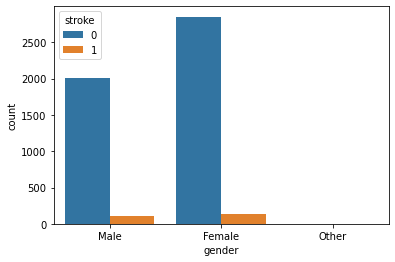

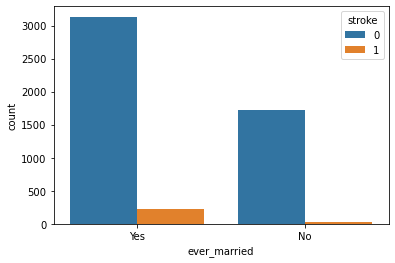

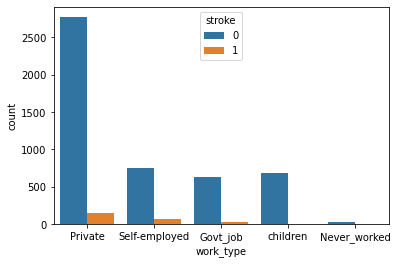

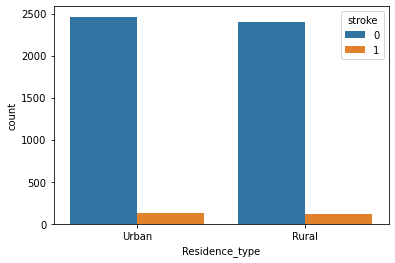

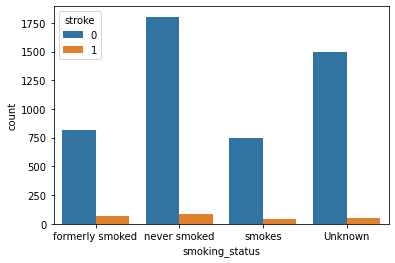

In [20]:
for i in categorical.columns:
    plt.subplots()
    sns.countplot(x=categorical[i],hue='stroke',data=df)

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
df['bmi'].mean()

28.893236911794673

In [23]:
df['bmi'].skew()

1.0553402052962912

<AxesSubplot:xlabel='bmi', ylabel='Density'>

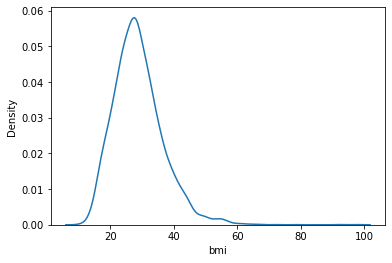

In [24]:
sns.kdeplot(x='bmi',data=df)

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [26]:
mm=MinMaxScaler()

In [27]:
# li=['bmi']
# mm.fit_transform(X=li)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

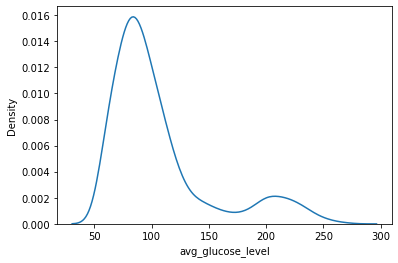

In [28]:
sns.kdeplot(x='avg_glucose_level',data=df)

In [29]:
# df['avg_glucose_level']=np.log(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

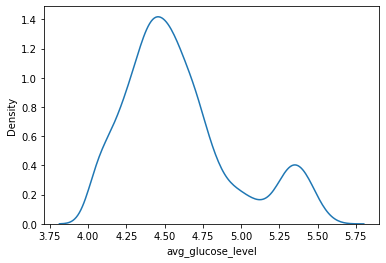

In [30]:
sns.kdeplot(x=np.log(df['avg_glucose_level']),data=df)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


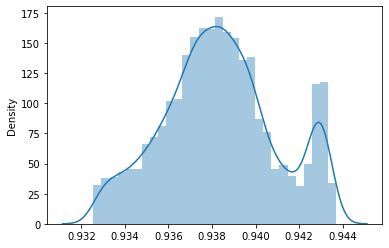

In [31]:
tdata = boxcox(df['avg_glucose_level'])[0]
# plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

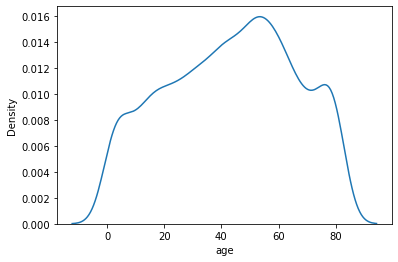

In [32]:
sns.kdeplot(x='age',data=df)

In [33]:
categorical=pd.get_dummies(data=categorical,drop_first=True)

In [34]:
categorical.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0


In [35]:
categorical['gender_Other'].value_counts()

0    5109
1       1
Name: gender_Other, dtype: int64

In [36]:
categorical['work_type_Never_worked'].value_counts()

0    5088
1      22
Name: work_type_Never_worked, dtype: int64

<AxesSubplot:>

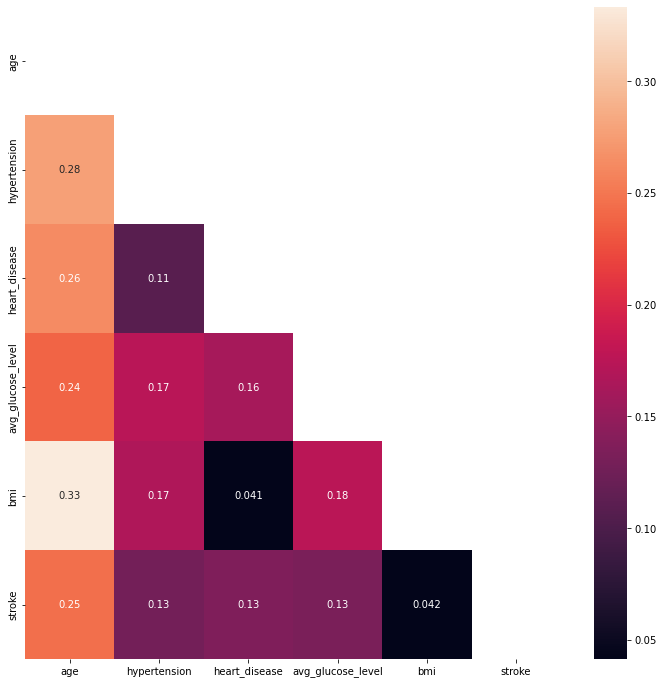

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True)

In [38]:
#age influence
# sns.scatterplot(x='age',hue='stroke',data=df)

<AxesSubplot:title={'center':'age distribution vs stroke'}, xlabel='age', ylabel='Density'>

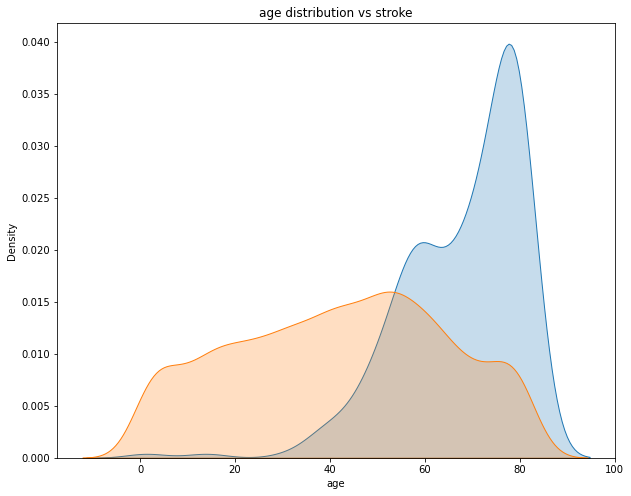

In [39]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot()
ax.grid(False)
# ax.text(8, 0.03, '|', {'font': 'Serif',
#                        'size': '20',
#                        'weight': 'bold',
#                        'color': 'black'}, alpha=0.9)
# ax.text(-5, 0.03, 'Stroke', {'font': 'Serif',
#                              'size': '20',
#                              'weight': 'bold',
#                              'color': two_colors[0]}, alpha=0.9)

plt.title("age distribution vs stroke")
sns.kdeplot(data=df[df['stroke']==1],x='age',shade=True,legend=True)
sns.kdeplot(data=df[df['stroke']==0],x='age',shade=True)

In [40]:
print(df['age'].max())
print(df['age'].min())

82.0
0.08


In [41]:
# X=df.drop('stroke',axis=1)
# y=df['stroke']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [42]:
ss=StandardScaler()

In [43]:
numerical=numerical.drop('stroke',axis=1)

In [44]:
ss_num=ss.fit_transform(numerical)

In [45]:
df_new=pd.DataFrame(data=ss_num,columns=list(numerical.columns))

In [46]:
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.051434,-0.328602,4.185032,2.706375,1.005086
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981
2,1.626390,-0.328602,4.185032,-0.005028,0.472536
3,0.255342,-0.328602,-0.238947,1.437358,0.719327
4,1.582163,3.043196,-0.238947,1.501184,-0.631531


In [47]:
new_df=pd.concat([df_new,categorical],axis=1)

In [48]:
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.005086,1,0,1,0,1,0,0,1,1,0,0
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,0,0,1,0,0,1,0,0,0,1,0
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,1,0,1,0,1,0,0,0,0,1,0
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,0,0,1,0,1,0,0,1,0,0,1
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,0,0,1,0,0,1,0,0,0,1,0


In [49]:
new_df.shape

(5110, 16)

In [50]:
new_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [51]:
# new_df=new_df.drop('gender_Other',axis=1)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(new_df,y,test_size=.25)

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(X_train,y_train)

LogisticRegression()

In [55]:
pred=lr.predict(X_test)
accuracy=accuracy_score(pred,y_test)

In [56]:
print(accuracy)

0.9546165884194053


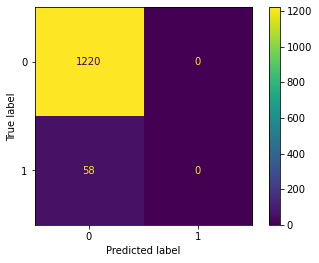

In [57]:
plot_confusion_matrix(lr,X_test,y_test)

In [58]:
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.005086,1,0,1,0,1,0,0,1,1,0,0
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,0,0,1,0,0,1,0,0,0,1,0
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,1,0,1,0,1,0,0,0,0,1,0
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,0,0,1,0,1,0,0,1,0,0,1
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,0,0,1,0,0,1,0,0,0,1,0


In [59]:
dup=new_df.drop('gender_Other',axis=1)

In [60]:
X_train,X_test,y_train,y_test=train_test_split(dup,y,test_size=.25)

In [61]:
lr.fit(X_train,y_train)

LogisticRegression()

In [62]:
pred=lr.predict(X_test)
accuracy=accuracy_score(pred,y_test)

In [63]:
print(accuracy)

0.9593114241001565


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1226
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.92      0.96      0.94      1278



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
pred_rf=lr.predict(X_test)
accuracy_rf=accuracy_score(pred_rf,y_test)

In [68]:
print(accuracy_rf)

0.9593114241001565


In [ ]:
print(classification_report(y_test,pred_rf))

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [70]:
knn=KNeighborsClassifier()
gnb=GaussianNB()
svm=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()

In [71]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(pred_knn,y_test)
print(accuracy_knn)

0.9553990610328639


In [ ]:
print(classification_report(y_test,pred_knn))

In [73]:
gnb.fit(X_train,y_train)

GaussianNB()

In [74]:
pred_gnb=gnb.predict(X_test)
accuracy_gnb=accuracy_score(pred_gnb,y_test)
print(accuracy_gnb)

0.3442879499217527


In [75]:
svm.fit(X_train,y_train)

SVC()

In [76]:
pred_svm=svm.predict(X_test)
accuracy_svm=accuracy_score(pred_svm,y_test)
print(accuracy_svm)

0.9593114241001565


In [77]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
pred_rfc=rfc.predict(X_test)
accuracy_rfc=accuracy_score(pred_rfc,y_test)
print(accuracy_rfc)

0.9585289514866979


In [79]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
pred_dtc=dtc.predict(X_test)
accuracy_dtc=accuracy_score(pred_dtc,y_test)
print(accuracy_dtc)

0.9194053208137715


In [81]:
bnb=BernoulliNB()

In [82]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [83]:
pred_bnb=bnb.predict(X_test)
accuracy_bnb=accuracy_score(pred_bnb,y_test)
print(accuracy_bnb)

0.9311424100156495


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbc=GradientBoostingClassifier()

In [86]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
pred_gbc=gbc.predict(X_test)
accuracy_gbc=accuracy_score(pred_gbc,y_test)
print(accuracy_gbc)

0.9585289514866979


In [88]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [89]:
pred_ada=ada.predict(X_test)
accuracy_ada=accuracy_score(pred_ada,y_test)
print(accuracy_ada)

0.9593114241001565


In [90]:
print("accuracy_logistic regression:-",accuracy)
print("accuracy_random forest:-",accuracy_rf)
print("accuracy_knearest neighbour:-",accuracy_knn)
print("accuracy_support vector machine:-",accuracy_svm)
print("accuracy_decision tree classfier:-",accuracy_dtc)
print("accuracy_bernoulli naive bayes:-",accuracy_bnb)
print("accuracy_gradient boosting classifer:-",accuracy_gbc)
print("accuracy_adaboost classifer:-",accuracy_ada)


accuracy_logistic regression:- 0.9593114241001565
accuracy_random forest:- 0.9593114241001565
accuracy_knearest neighbour:- 0.9553990610328639
accuracy_support vector machine:- 0.9593114241001565
accuracy_decision tree classfier:- 0.9194053208137715
accuracy_bernoulli naive bayes:- 0.9311424100156495
accuracy_gradient boosting classifer:- 0.9585289514866979
accuracy_adaboost classifer:- 0.9593114241001565
